In [20]:

#importing packages
import os
os.environ['USE_PYGEOS'] = '0'
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import fiona
from fiona import Feature, Geometry
from shapely.geometry import mapping
import rioxarray as rxr
import xarray as xr
import geopandas as gpd
import rasterio as rio
from rasterio.enums import Resampling

import skgstat as skg



In [21]:
#stacked Green, Red, Red Edge, and Near Infrared band individual rasters into one multi-band raster
top_path='S:/mc5545/SA_Drone_data/'


In [22]:
raster_path1 = top_path+'burnplot18_lr/reflectance'
raster_filename1 = 'burnplot18_lr_band_stack.tif'

raster_path2 = top_path+'burn2016_lr/reflectance'
raster_filename2 = 'burn2016_lr_band_stack.tif'

raster_path3 = top_path+'burn2017&2016_lr/reflectance'
raster_filename3 = 'burn2017&2016_lr_band_stack.tif'

raster_path4 = top_path+'burn2019_lr/reflectance'
raster_filename4 = 'burn2019_lr_band_stack.tif'

raster_path5 = top_path+'burnplot17_lr/reflectance'
raster_filename5 = 'burnplot17_lr_band_stack.tif'

raster_path6 = top_path+'burn2022_lr/reflectance'
raster_filename6 = 'burn2022_lr_band_stack.tif'


In [23]:
shapefiles1 = gpd.read_file(Path(top_path,'burnplot18_lr/burnplot18_lr_shape/burnplot18_lr_shp.shp'))
shapefiles2 = gpd.read_file(Path(top_path,'burn2016_lr/burn2016_lr_shape/burn2016_lr_shp.shp'))
shapefiles3 = gpd.read_file(Path(top_path,'burn2017&2016_lr/burn2017_shape/burn2017_shp.shp'))
shapefiles4 = gpd.read_file(Path(top_path,'burn2019_lr/burn2019_lr_shape/burn2019_lr_shp.shp'))
#shapefiles5 = gpd.read_file(Path(top_path,'burnplot17_lr/burnplot17_lr_shape/burnplot17_lr_shp.shp'))
shapefiles6 = gpd.read_file(Path(top_path,'burn2022_lr/burn2022_lr_shape/burn2022_lr_shp.shp'))

In [24]:
#load raster1
def variogram_preprocess(raster_path, raster_filename, shapefiles):
    raster = rxr.open_rasterio(Path(raster_path, raster_filename),masked=True).squeeze()
    geometries = shapefiles.geometry.apply(mapping)
    
    
    # Create an empty list to store the clipped rasters
    clipped_rasters = []
    for i in range(len(shapefiles)):
        # Clip the raster with the current geometry
        p1 = raster.rio.clip([geometries[i]],shapefiles.crs)
        # Convert the clipped raster to a NumPy array
        p1_np = np.asarray(p1)
        # Append the clipped raster array to the list
        clipped_rasters.append(p1_np)
        
        
    # Initialize lists to store mean values for each band
    mean_values_band1 = []
    mean_values_band2 = []
    mean_values_band3 = []
    mean_values_band4 = []
    # Loop through each raster
    for raster in clipped_rasters:
        # Calculate mean for each band and append to the respective list
        mean_values_band1.append(np.nanmean(raster[0]))
        mean_values_band2.append(np.nanmean(raster[1]))
        mean_values_band3.append(np.nanmean(raster[2]))
        mean_values_band4.append(np.nanmean(raster[3]))
        
    # Now, mean_values_band1, mean_values_band2, mean_values_band3, mean_values_band4
    # contain the mean values for each band across all clipped rasters
        
    # Combine mean values into a single NumPy array
    mean_values = np.vstack((mean_values_band1, mean_values_band2, 
                                     mean_values_band3, mean_values_band4))
    # Now, mean_values_array is a NumPy array where each column represents the mean values for a specific band l=mean_values[0] 
    #shp.crs
    #shp.plot()
    
    # Assuming 'gdf' is your GeoDataFrame
    centroid =shapefiles.geometry.centroid
    #centroid.dtypes
    
    # Extract X and Y coordinates from the centroids
    df = pd.DataFrame({"x": centroid.x, 
                       "y": centroid.y,
                       "mean_Green":mean_values[0],
                       "mean_Red":mean_values[1],
                       "mean_RedEdge":mean_values[2],
                       "mean_NIR":mean_values[3]})
    return df

In [25]:
df1=variogram_preprocess(raster_path1, raster_filename1, shapefiles1)
df2=variogram_preprocess(raster_path2, raster_filename2, shapefiles2)
df3=variogram_preprocess(raster_path3, raster_filename3, shapefiles3)
df4=variogram_preprocess(raster_path4, raster_filename4, shapefiles4)
#df5=variogram_preprocess(raster_path5, raster_filename5, shapefiles5)
df6=variogram_preprocess(raster_path6, raster_filename6, shapefiles6)

C:\Users\mc5545\.conda\envs\ag_env\lib\site-packages\geopandas\geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)
C:\Users\mc5545\.conda\envs\ag_env\lib\site-packages\geopandas\geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)
C:\Users\mc5545\.conda\envs\ag_env\lib\site-packages\geopandas\geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, a

In [30]:
directory_path='S:/mc5545/SA_Drone_data/variogram_preprocessed/'
# Save DataFrame to a CSV file with index
#df1.to_csv(f'{directory_path}2006_burnplot18.csv')
df2.to_csv(f'{directory_path}2016_burn2016.csv')
df3.to_csv(f'{directory_path}2017_burn2017.csv')
df4.to_csv(f'{directory_path}2019_burn2019.csv')
#df5.to_csv(f'{directory_path}2020_burnplot17.csv')
df6.to_csv(f'{directory_path}2022_burn2022.csv')

# Load DataFrame from the CSV file
#loaded_df = pd.read_csv(f'{directory_path}2006_burnplot18.csv', index_col=0)

# Now, loaded_df contains the data from the CSV file, including the index
#print(loaded_df)


In [42]:
# Calculation variogram :mean_Green, mean_Red; mean_RedEdge ;mean_NIR
#2006_burnplot18
V = skg.Variogram(coordinates=df1[['x', 'y']].values, values=df1['mean_NIR'].values)
print(V)



spherical Variogram
-------------------
Estimator:         matheron
Effective Range:   6.46
Sill:              0.00
Nugget:            0.00
        


C:\Users\mc5545\.conda\envs\ag_env\lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

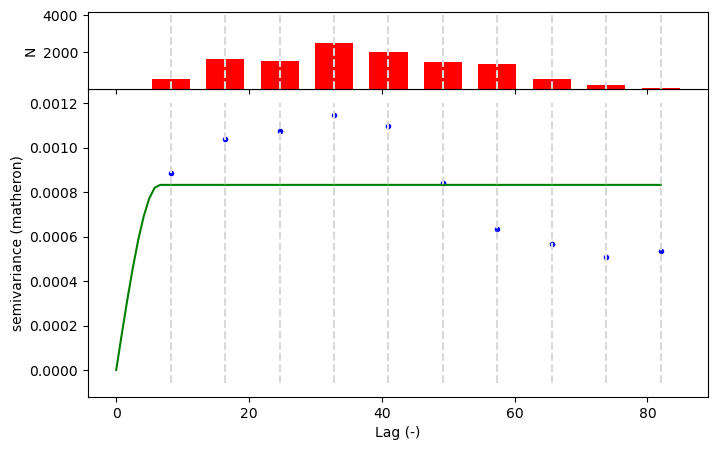

In [43]:
# Variogram visualization
V.plot()
plt.close

In [52]:
# Calculation variogram :mean_Green, mean_Red; mean_RedEdge ;mean_NIR
#2016_burn2016

V = skg.Variogram(coordinates=df2[['x', 'y']].values, values=df2['mean_NIR'].values)
print(V)


spherical Variogram
-------------------
Estimator:         matheron
Effective Range:   71.79
Sill:              0.00
Nugget:            0.00
        


C:\Users\mc5545\.conda\envs\ag_env\lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

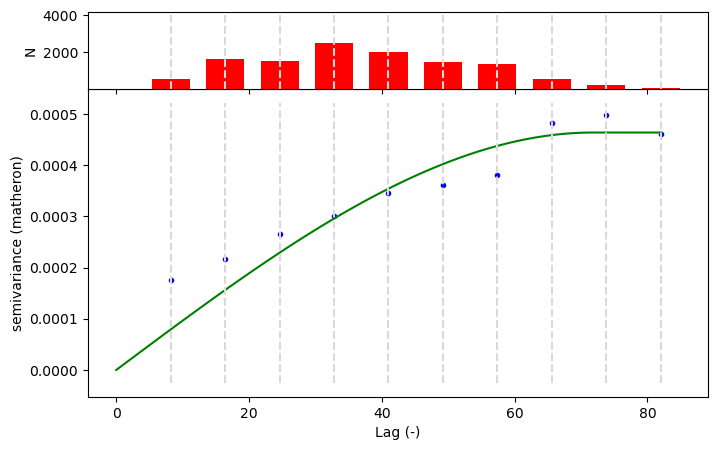

In [53]:
# Variogram visualization
V.plot()
plt.close

In [60]:
# Calculation variogram :mean_Green, mean_Red; mean_RedEdge ;mean_NIR
#2017_burn2017
V = skg.Variogram(coordinates=df3[['x', 'y']].values, values=df3['mean_NIR'].values)
print(V)

spherical Variogram
-------------------
Estimator:         matheron
Effective Range:   89.02
Sill:              0.00
Nugget:            0.00
        


C:\Users\mc5545\.conda\envs\ag_env\lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

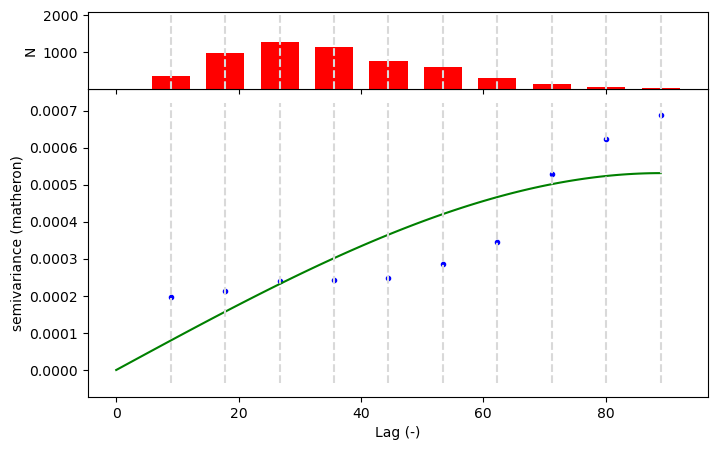

In [61]:
# Variogram visualization
V.plot()
plt.close

In [68]:
# Calculation variogram :mean_Green, mean_Red; mean_RedEdge ;mean_NIR
#2019_burn2019
V = skg.Variogram(coordinates=df4[['x', 'y']].values, values=df4['mean_NIR'].values)
print(V)

spherical Variogram
-------------------
Estimator:         matheron
Effective Range:   53.71
Sill:              0.00
Nugget:            0.00
        


C:\Users\mc5545\.conda\envs\ag_env\lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

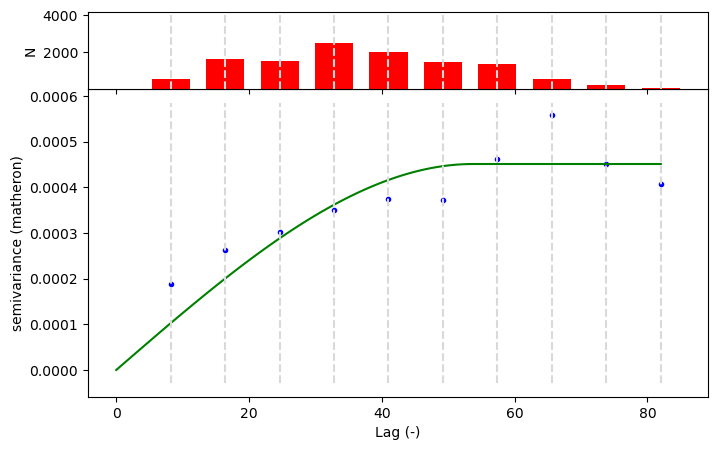

In [69]:
# Variogram visualization
V.plot()
plt.close

In [78]:
# Calculation variogram :mean_Green, mean_Red; mean_RedEdge ;mean_NIR
#2022_burn2022
V = skg.Variogram(coordinates=df6[['x', 'y']].values, values=df6['mean_NIR'].values)
print(V)

spherical Variogram
-------------------
Estimator:         matheron
Effective Range:   82.01
Sill:              0.00
Nugget:            0.00
        


C:\Users\mc5545\.conda\envs\ag_env\lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

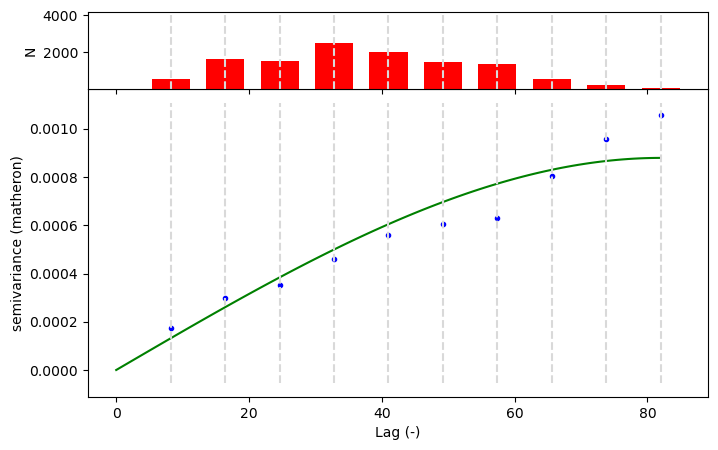

In [79]:
# Variogram visualization
V.plot()
plt.close